In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as st
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
df_out = pd.read_pickle('df_out.pkl')
df_breeds = pd.read_pickle('df_breeds.pkl')
df_out_with_breeds_info = pd.read_pickle('df_out_with_breeks_info.pkl')
df_breeds_with_info = pd.read_pickle('df_breeds_with_info.pkl')
df_out.info()
df_out.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149511 entries, 0 to 149510
Data columns (total 39 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Animal ID                 149511 non-null  string        
 1   Name                      106260 non-null  string        
 2   Outcome DateTime          149511 non-null  datetime64[ns]
 3   Outcome MonthYear         149511 non-null  string        
 4   Date of Birth             149511 non-null  datetime64[ns]
 5   Outcome Type              149485 non-null  string        
 6   Outcome Subtype           68443 non-null   string        
 7   Animal Type               149511 non-null  string        
 8   Sex upon Outcome          149509 non-null  string        
 9   Age upon Outcome          149465 non-null  string        
 10  Breed                     149511 non-null  string        
 11  Color                     149511 non-null  string        
 12  In

,Animal ID,Name,Outcome DateTime,Outcome MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,...,Color 1 G,Color 1 B,Color 1 H,Color 1 S,Color 1 V,Age upon Outcome (years),Male,Female,NeuteredOrSpayed,Adopted
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,<NA>,Cat,Neutered Male,2 years,...,1.0,1.0,0.0,0.0,1.0,2.0,True,False,True,True
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,<NA>,Dog,Neutered Male,1 year,...,0.44,0.09,0.119444,0.85,0.59,1.0,True,False,True,True
2,A821648,<NA>,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,<NA>,Other,Unknown,1 year,...,<NA>,<NA>,<NA>,<NA>,<NA>,1.0,False,False,False,False
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,<NA>,Dog,Neutered Male,4 months,...,<NA>,<NA>,<NA>,<NA>,<NA>,0.333333,True,False,True,True
4,A674754,<NA>,2014-03-18 11:47:00,Mar 2014,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,...,<NA>,<NA>,<NA>,<NA>,<NA>,0.016438,True,False,False,False


In [3]:
df_breeds_with_info.head()

,Breed,Count,Animal Type,Adopted,Color 0 R (mean),Color 0 R (std dev),Color 0 G (mean),Color 0 G (std dev),Color 0 B (mean),Color 0 B (std dev),...,CKC Subgroup,height_low_inches,height_high_inches,average height,weight_low_lbs,weight_high_lbs,average weight,Lifespan Low,Lifespan High,average lifespan
0,Domestic Shorthair Mix,33260,Cat,0.461425,0.439476,0.412274,0.322711,0.323957,0.286948,0.413041,...,11-A: Pointing Dogs,21.0,26.0,23.5,45.0,70,57.5,10,12,11.0
1,Domestic Shorthair,13808,Cat,0.553158,0.451115,0.412934,0.331264,0.324532,0.293482,0.413847,...,11-A: Pointing Dogs,21.0,26.0,23.5,45.0,70,57.5,10,12,11.0
2,Pit Bull Mix,9406,Dog,0.431427,0.513666,0.403283,0.418784,0.381554,0.476534,0.439715,...,4-B: Bull-and-Terrier Breeds,17.0,22.0,19.5,30.0,75,52.5,10,12,11.0
3,Labrador Retriever Mix,7913,Dog,0.546063,0.409771,0.421755,0.329495,0.388036,0.181561,0.323025,...,11-C: Retrievers and Waterdogs,21.0,25.0,23.0,55.0,80,67.5,10,12,11.0
4,Chihuahua Shorthair Mix,6689,Dog,0.483181,0.609789,0.370759,0.493648,0.361854,0.356013,0.369441,...,12-A: Americas and Caribbean Breeds,5.0,10.0,7.5,1.0,7,4.0,14,16,15.0


# Analysis by breed

### Popular breeds

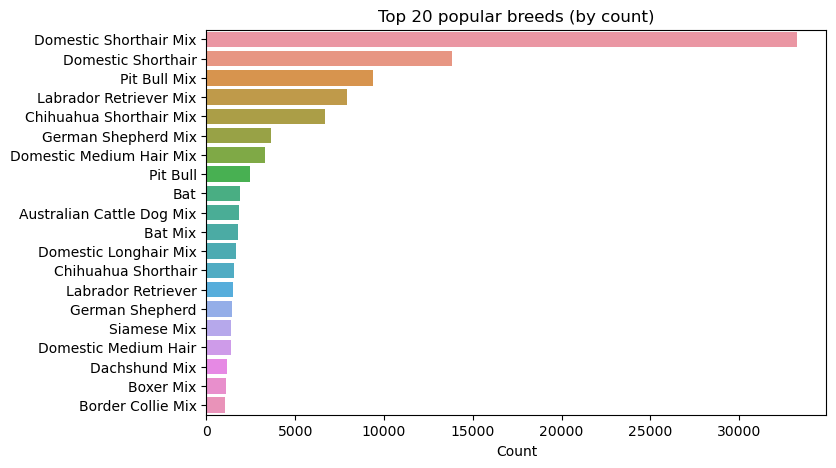

In [4]:
df_breeds_with_info_sorted_by_breed = df_breeds_with_info.sort_values('Count', ascending=False)

k = 20
plt.figure(figsize=(8,5))
sns.barplot(
    data=df_breeds_with_info_sorted_by_breed.head(k),
    x='Count',
    y='Breed',
    errorbar=None,
)
plt.xlabel('Count')
plt.ylabel(None)
plt.title(f'Top {k} popular breeds (by count)')
plt.show()

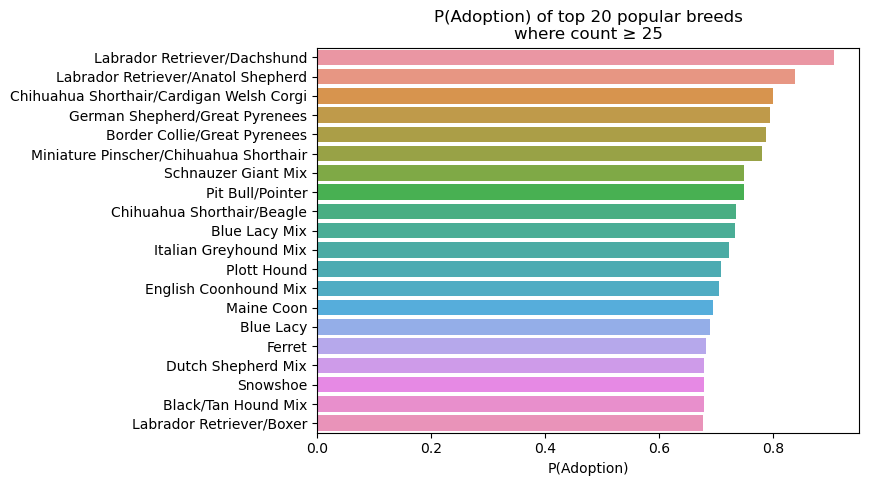

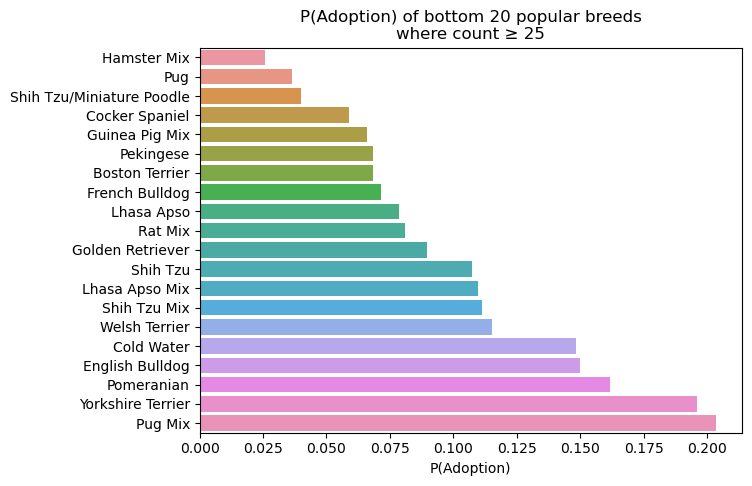

In [5]:
n = 25
df_breeds_with_info_sorted_by_breed = df_breeds_with_info.loc[df_breeds_with_info.Count >= n]

k = 20

plt.figure(figsize=(7,5))
sns.barplot(
    data=df_breeds_with_info_sorted_by_breed.sort_values('Adopted', ascending=False).head(k),
    x='Adopted',
    y='Breed',
    errorbar=None,
)
plt.xlabel('P(Adoption)')
plt.ylabel(None)
plt.title(f'P(Adoption) of top {k} popular breeds\nwhere count ≥ {n}')
plt.show()

plt.figure(figsize=(7,5))
sns.barplot(
    data=df_breeds_with_info_sorted_by_breed.sort_values('Adopted', ascending=True).head(k),
    x='Adopted',
    y='Breed',
    errorbar=None,
)
plt.xlabel('P(Adoption)')
plt.ylabel(None)
plt.title(f'P(Adoption) of bottom {k} popular breeds\nwhere count ≥ {n}')
plt.show()

### Correlating with every variable

There isn't much correlation appearing yet

/tmp/ipykernel_13396/4118066584.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_breeds_with_info_corr = df_breeds_with_info.corr()


Corr(Adopted, Color 0 B (mean)) ≈ -0.057521961020765885
Corr(Adopted, Color 0 B (std dev)) ≈ -0.21220098425344674
Corr(Adopted, Color 0 V (mean)) ≈ -0.05892713325516749
Corr(Adopted, Color 0 V (std dev)) ≈ -0.22375794566214077
Corr(Adopted, average height) ≈ 0.07520172186737319
Corr(Adopted, height_low_inches) ≈ 0.08043859187253975
Corr(Adopted, height_high_inches) ≈ 0.06827302387620472
Corr(Adopted, Lifespan Low) ≈ 0.011194168083224364


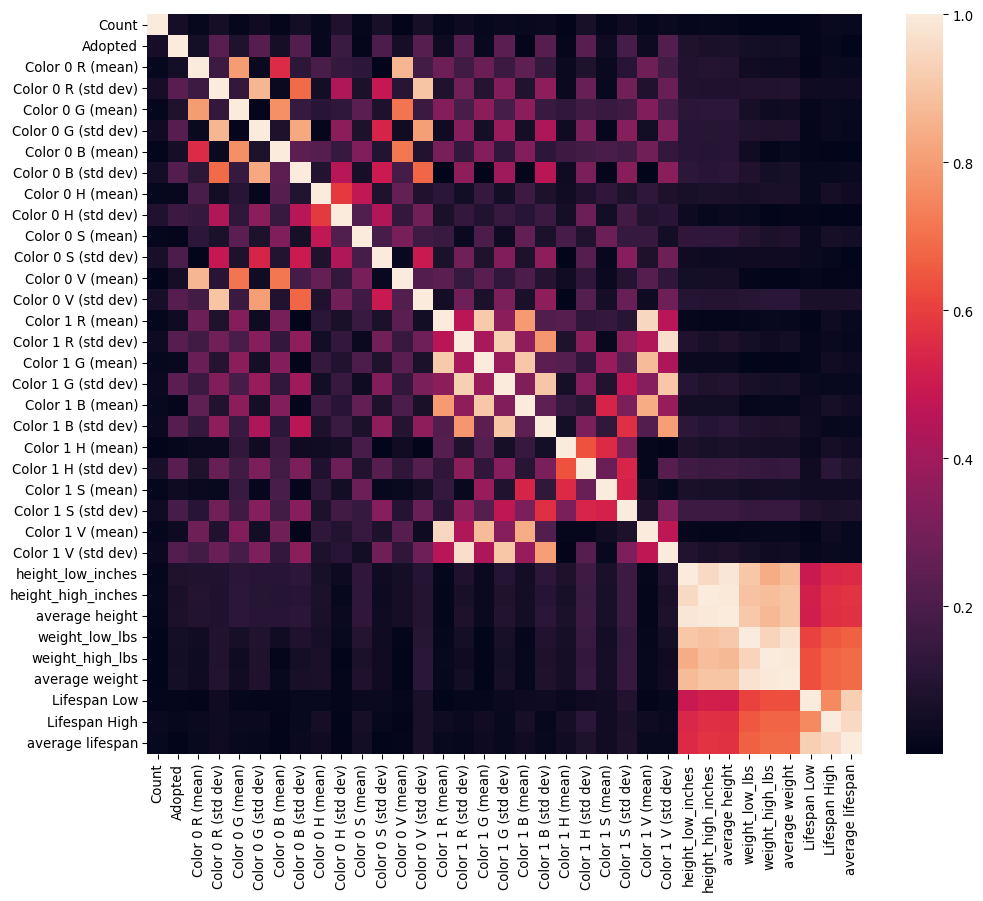

In [6]:
df_breeds_with_info_corr = df_breeds_with_info.corr()

plt.figure(num=None, figsize=(12, 10), dpi=96, facecolor='w', edgecolor='k')
sns.heatmap(data=df_breeds_with_info_corr.abs())

def score(df, var1, var2):
    print(f'Corr({var1}, {var2}) ≈ {df[var1][var2]}')

score(df_breeds_with_info_corr, 'Adopted', 'Color 0 B (mean)')
score(df_breeds_with_info_corr, 'Adopted', 'Color 0 B (std dev)')
score(df_breeds_with_info_corr, 'Adopted', 'Color 0 V (mean)')
score(df_breeds_with_info_corr, 'Adopted', 'Color 0 V (std dev)')
score(df_breeds_with_info_corr, 'Adopted', 'average height')
score(df_breeds_with_info_corr, 'Adopted', 'height_low_inches')
score(df_breeds_with_info_corr, 'Adopted', 'height_high_inches')
score(df_breeds_with_info_corr, 'Adopted', 'Lifespan Low')

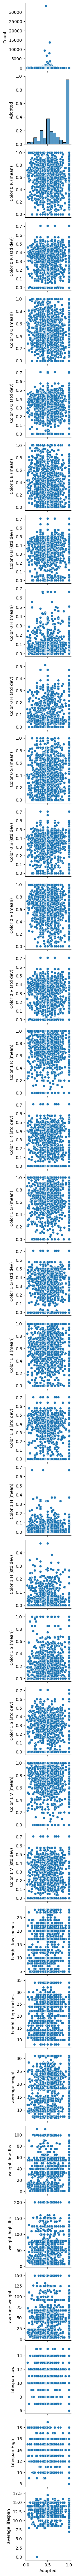

In [7]:
sns.pairplot(data=df_breeds_with_info, x_vars=['Adopted'])

## Height ~ adopted?

Is the average height of a breed correlated with likelihood of an animal from that breed being adopted? The Pearson correlation coefficient was Corr(Adopted, average height) ≈ 0.2286839421877296.

This section analyzes this by breed and also by individual animal.

See also: toward the end of this notebook, there are histograms that compare many variables with adoption likelihood.

In [8]:
df_hl = df_out_with_breeds_info[['average height', 'Adopted']].dropna()

y_data = df_hl['Adopted'].astype(dtype=int)
x_data = df_hl['average height'].astype(dtype=float)

x_data = x_data.values.reshape(-1,1)

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)
model = LogisticRegression()
model.fit(x_training_data, y_training_data)
print(classification_report(y_test_data, model.predict(x_test_data)))

              precision    recall  f1-score   support

           0       0.53      0.41      0.46     21173
           1       0.50      0.62      0.55     20347

    accuracy                           0.51     41520
   macro avg       0.52      0.51      0.51     41520
weighted avg       0.52      0.51      0.51     41520



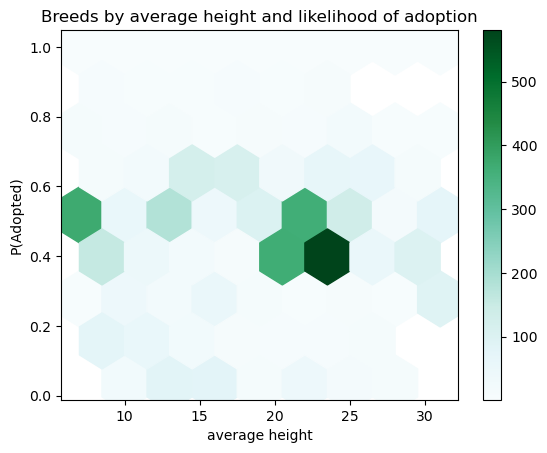

In [9]:
df_breeds_with_info.plot.hexbin(x='average height', y='Adopted', gridsize=8, C='Count')
plt.ylabel("P(Adopted)")
plt.title("Breeds by average height and likelihood of adoption")
plt.show()

I think with all this analaysis on height ~ adoption, I dont find a strong correlation between the two.


# Analysis by individuals

## Color

(results)

In [11]:
print('Colors')
print(df_out_with_breeds_info['Color 0'].unique())
print(df_out_with_breeds_info['Color 1'].unique())

Colors
<StringArray>
[      'Brown Tabby',             'White',              'Gray',
              'Buff',      'Orange Tabby',             'Brown',
             'Black',              'Blue',            'Calico',
          'Tricolor',     'Brown Brindle',               'Tan',
         'Chocolate',               'Red',         'Blue Tick',
            'Tortie',             'Sable',       'Cream Tabby',
        'Blue Tabby',        'Blue Merle',       'Brown Merle',
            'Silver',           'Apricot',      'Tortie Point',
        'Seal Point',            'Torbie',              'Fawn',
        'Lynx Point',             'Cream',     'Black Brindle',
            'Yellow',   'Chocolate Point',        'Blue Smoke',
      'Silver Tabby',        'Gray Tabby',            'Orange',
       'Brown Tiger',    'Yellow Brindle',              'Gold',
       'Black Tabby',       'Flame Point',      'Calico Point',
             'Green',       'Black Smoke',        'Blue Cream',
       'Lilac Point

In [12]:
df_out_colors_1 = df_out.loc[(df_out['Color 0'].notna() == True) & (df_out['Color 1'].notna() == False)]
df_out_colors_2 = df_out.loc[(df_out['Color 0'].notna() == True) & (df_out['Color 1'].notna() == True)]

In [13]:
def bigCorr_bernoulli(df, independent, dependent):
    numerator = (
        df[[independent, dependent]].groupby(independent).value_counts()
    )
    
    denominator = (
        df[[independent]].groupby(independent).value_counts()
    )
    
    return (numerator.div(denominator))[:,True]

In [14]:
def bigCorr_bernoulli_custom_colors_2():
    df_out_colors_2_color_0 = df_out_colors_2[['Color 0', 'Adopted']].rename(columns={'Color 0': 'Color'})
    df_out_colors_2_color_1 = df_out_colors_2[['Color 1', 'Adopted']].rename(columns={'Color 1': 'Color'})
    
    numerator = (
        df_out_colors_2_color_0.groupby('Color').value_counts().add(
            df_out_colors_2_color_1.groupby('Color').value_counts(),
            fill_value=0
        )
    )
    
    denominator = (
        df_out_colors_2_color_0[['Color']].groupby('Color').value_counts().add(
            df_out_colors_2_color_1[['Color']].groupby('Color').value_counts(),
            fill_value=0
        )
    )
    
    return (numerator.div(denominator))[:,True]

def bigCorr_bernoulli_custom_colors_1_or_2():
    df_out_colors_1_color_0 = df_out_colors_1[['Color 0', 'Adopted']].rename(columns={'Color 0': 'Color'})
    df_out_colors_2_color_0 = df_out_colors_2[['Color 0', 'Adopted']].rename(columns={'Color 0': 'Color'})
    df_out_colors_2_color_1 = df_out_colors_2[['Color 1', 'Adopted']].rename(columns={'Color 1': 'Color'})
    
    numerator = (
        df_out_colors_1_color_0.groupby('Color').value_counts().add(
            df_out_colors_2_color_0.groupby('Color').value_counts().add(
                df_out_colors_2_color_1.groupby('Color').value_counts(),
                fill_value=0
            ),
            fill_value=0
        )
    )
    
    denominator = (
        df_out_colors_1_color_0[['Color']].groupby('Color').value_counts().add(
            df_out_colors_2_color_0[['Color']].groupby('Color').value_counts().add(
                df_out_colors_2_color_1[['Color']].groupby('Color').value_counts(),
                fill_value=0
            ),
            fill_value=0
        )
    )
    
    return (numerator.div(denominator))[:,True]

In [15]:
# This is copied from prep.ipynb

from math import pi

# colors.csv was compiled from these wikipedia articles
# https://en.wikipedia.org/wiki/List_of_colors:_A–F
# https://en.wikipedia.org/wiki/List_of_colors:_G%E2%80%93M
# https://en.wikipedia.org/wiki/List_of_colors:_N%E2%80%93Z
# Then the "—" character was replaced with "0"
df_colors = pd.read_csv('colors.csv')
df_colors = df_colors.convert_dtypes(infer_objects=True)
df_colors['Name'] = df_colors['Name'].str.lower()
df_colors['Red (RGB)'] = pd.to_numeric(df_colors['Red (RGB)'].str.replace('%', '')).div(100)
df_colors['Green (RGB)'] = pd.to_numeric(df_colors['Green (RGB)'].str.replace('%', '')).div(100)
df_colors['Blue (RGB)'] = pd.to_numeric(df_colors['Blue (RGB)'].str.replace('%', '')).div(100)
df_colors['Hue (HSL/HSV)'] = pd.to_numeric(df_colors['Hue (HSL/HSV)'].str.replace('°', '')).div(360)
df_colors['Satur. (HSL)'] = pd.to_numeric(df_colors['Satur. (HSL)'].str.replace('%', '')).div(100)
df_colors['Light (HSL)'] = pd.to_numeric(df_colors['Light (HSL)'].str.replace('%', '')).div(100)
df_colors['Satur. (HSV)'] = pd.to_numeric(df_colors['Satur. (HSV)'].str.replace('%', '')).div(100)
df_colors['Value (HSV)'] = pd.to_numeric(df_colors['Value (HSV)'].str.replace('%', '')).div(100)
df_colors.head()

def colorInfo(color):
    color = color.lower()
    words = [color] if color.count(' ') == 0 else [color] + color.split(' ')
    for word in words:
        try:
            items = df_colors.loc[df_colors.Name == word]
            if len(items) > 0:
                return items
        except:
            continue
    
    for word in words:
        try:
            items = df_colors.loc[df_colors.Name.str.contains(word)]
            if len(items) > 0:
                return items
        except:
            continue
        
    return None

def rgb(color):
    info = colorInfo(color)
    if info is None: return (None, None, None)
    r = info['Red (RGB)'].values[0]
    g = info['Green (RGB)'].values[0]
    b = info['Blue (RGB)'].values[0]
    return (r, g, b)

/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


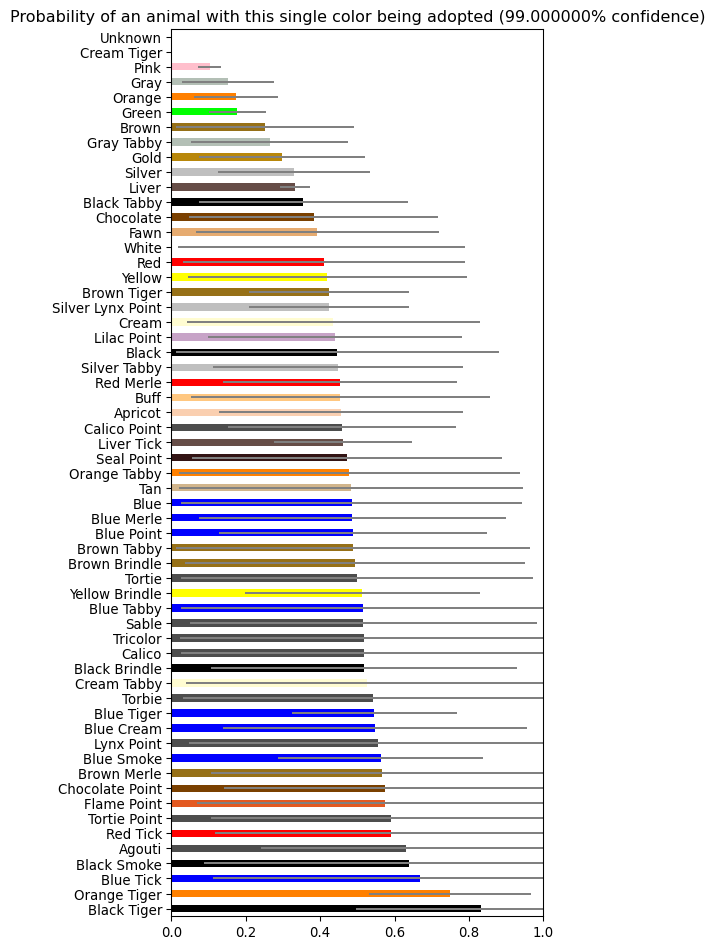

59 colors



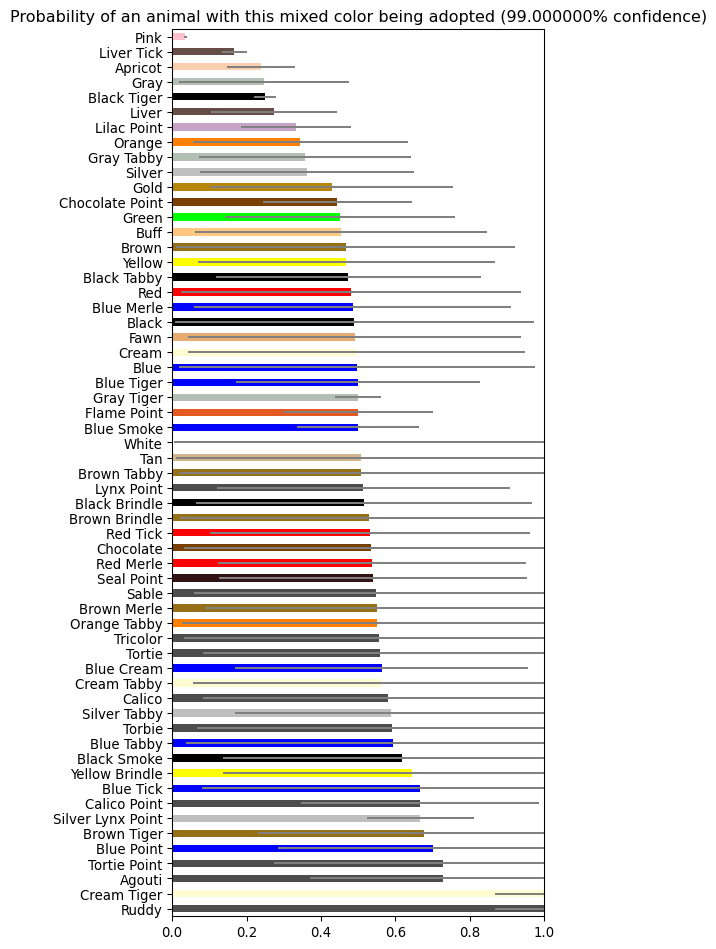

59 colors



/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


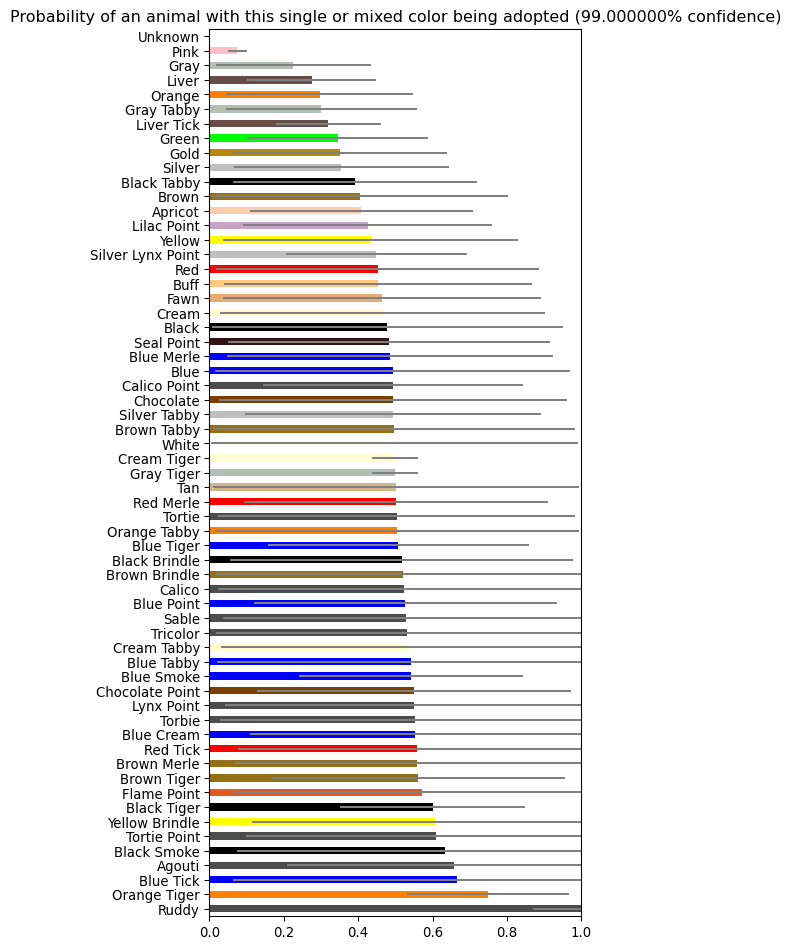

61 colors



<AxesSubplot:title={'center':'Probability of an animal with this solid color having a certain outcome'}, xlabel='Count', ylabel='Color 0'>

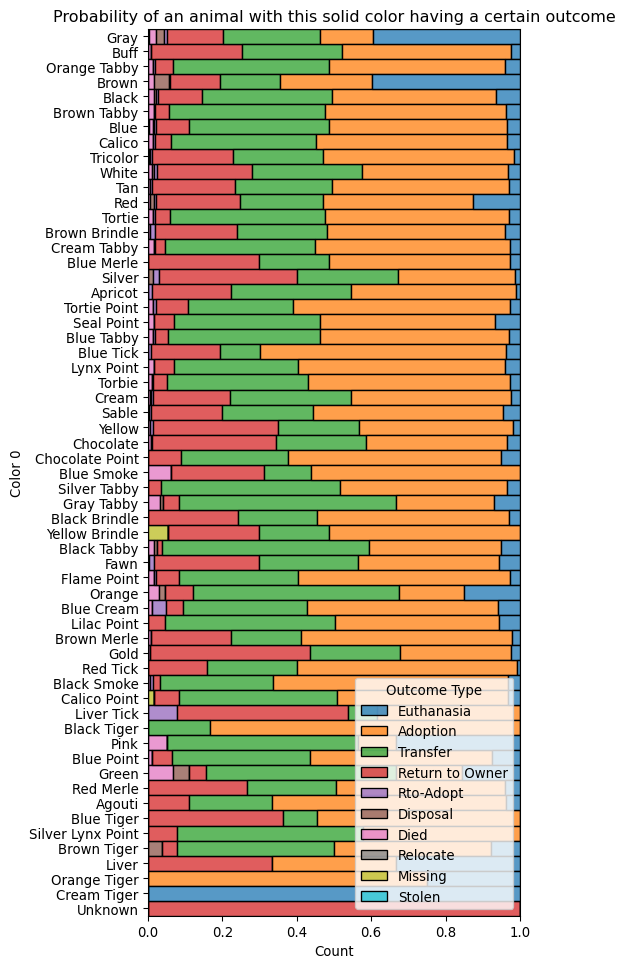

In [16]:
def chartColorAdoptionLikelihood(df_colors, color_relation):
    
    # Wilson confidence interval
    # https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval
    
    alpha = 0.01
    z = st.norm.ppf(1 - (alpha / 2))
    n = df_colors.Count
    p = df_colors.Adopted
    p_center = (1 / (1 + ((z ** 2) / n))) * (p + ((z ** 2) / (2 * n)))
    p_halfextent = (z / (1 + ((z ** 2) / n))) * ((( (p * (1 - p)) / (n) ) + ((z ** 2) / (4 * (n ** 2)))) ** (1/2))
    p_low = p_center - p_halfextent
    p_high = p_center - p_halfextent
    
    colors = [rgb(color) for color in df_colors.index]
    colors = [color if color[0] != None else '0.3' for color in colors]
    
    plt.figure(num=None, figsize=(5, 12), dpi=96, facecolor='w', edgecolor='k')
    plt.title(f'Probability of an animal with this {color_relation} color being adopted ({(1 - alpha):%} confidence)')
    ax = df_colors.Adopted.plot.barh(x='Color', xerr=[p_low, p_high], ecolor='0.5', color=colors)
    ax.set_xlim(0, 1)
    plt.show()
    print(f'{len(df_colors)} colors')
    print()

def colors_single():
    colors_adopted = bigCorr_bernoulli(df_out_colors_1, 'Color 0', 'Adopted')
    colors_count = df_out_colors_1['Color 0'].value_counts()
    df_colors = pd.DataFrame(index=colors_count.index)
    df_colors = df_colors.assign(Color=colors_count.index, Count=colors_count, Adopted=colors_adopted)
    df_colors.sort_values(by='Adopted', ascending=False, inplace=True)
    chartColorAdoptionLikelihood(df_colors, 'single')
    
def colors_mixed():
    colors_adopted = bigCorr_bernoulli_custom_colors_2()
    colors_count = df_out_colors_2['Color 0'].value_counts().add(df_out_colors_2['Color 1'].value_counts(), fill_value=0)
    df_colors = pd.DataFrame(index=colors_count.index)
    df_colors = df_colors.assign(Color=colors_count.index, Count=colors_count, Adopted=colors_adopted)
    df_colors.sort_values(by='Adopted', ascending=False, inplace=True)
    chartColorAdoptionLikelihood(df_colors, 'mixed')
    
def colors_singleOrMixed():
    colors_adopted = bigCorr_bernoulli_custom_colors_1_or_2()
    colors_count = df_out_colors_1['Color 0'].value_counts().add(df_out_colors_2['Color 0'].value_counts(), fill_value=0).add(df_out_colors_2['Color 1'].value_counts(), fill_value=0)
    df_colors = pd.DataFrame(index=colors_count.index)
    df_colors = df_colors.assign(Color=colors_count.index, Count=colors_count, Adopted=colors_adopted)
    df_colors.sort_values(by='Adopted', ascending=False, inplace=True)
    chartColorAdoptionLikelihood(df_colors, 'single or mixed')

colors_single()
colors_mixed()
colors_singleOrMixed()

# TODO 5: make an outcome chart like this for mixed and solid+mixed
# like the bar charts were made for just the Adopted percentage earlier
df_colors_outcomes = df_out_colors_1[['Outcome Type', 'Color 0']]
plt.figure(num=None, figsize=(5, 12), dpi=96, facecolor='w', edgecolor='k')
plt.title('Probability of an animal with this solid color having a certain outcome')
sns.histplot(
    data=df_colors_outcomes,
    y='Color 0',
    hue='Outcome Type',
    multiple='fill',
)

## Sex

In [17]:
# TODO 6: regress sex against adoption likelihood
# Please make 3 bar charts:
#  - "Sex upon Outcome" (neutered male, spayed female, intact male, intact female)
#  - male or female
#  - neutered/spayed or intact
# Also please construct the 95% confidence interval and make it the error bars
# see the earlier cell in the section on color for an example of how to do this

## Breed characteristics

This analysis considers individual animals and looks for correlations between characteristics of their breed and their outcome.

It looks like the animals belonging to a breed with an average height around 20-25 \(inches?\) are more likely to be adopted than others, and animals between 5-12 inches are less likely than others to be adopted.

**TODO 7:** interpret the other graphs. Why are the different lifespan variables distributed the way they are, and why are they distributed differently compared to each other?

average height ~ Adopted


/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not in

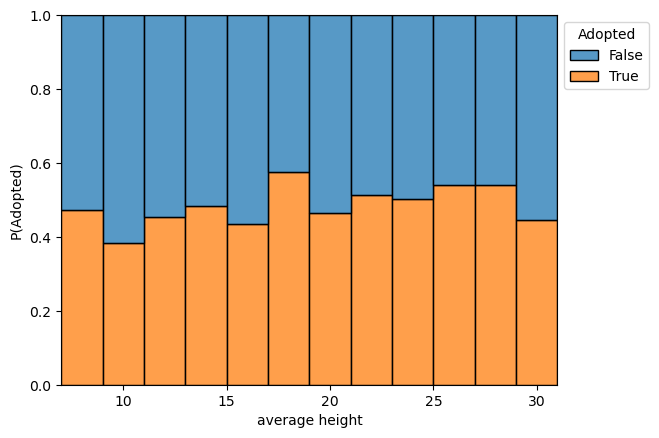

average height ~ Outcome Type


/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not in

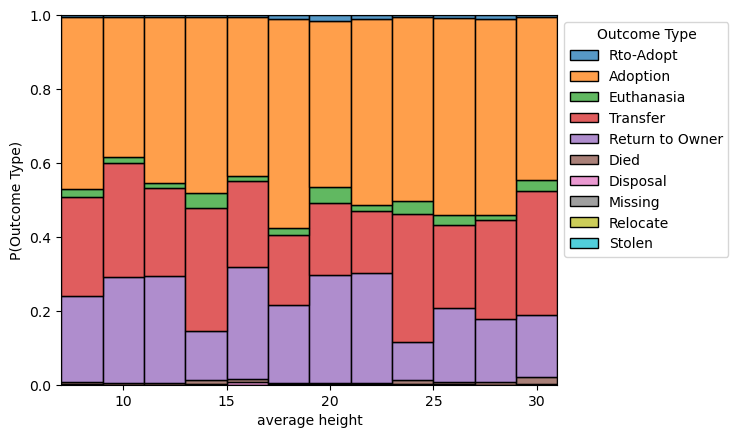

Est. lifespan remaining ~ Adopted


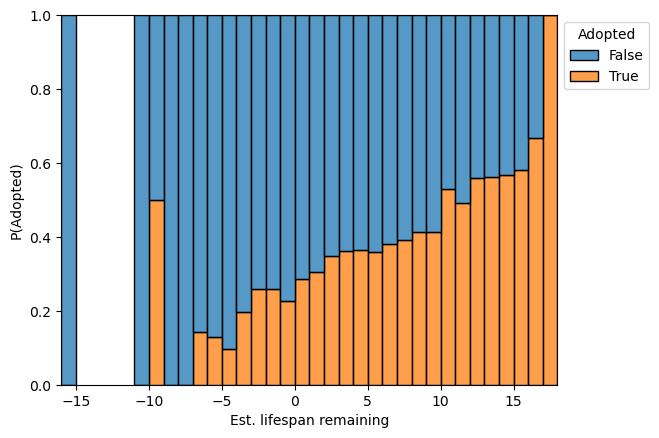

Est. lifespan remaining ~ Outcome Type


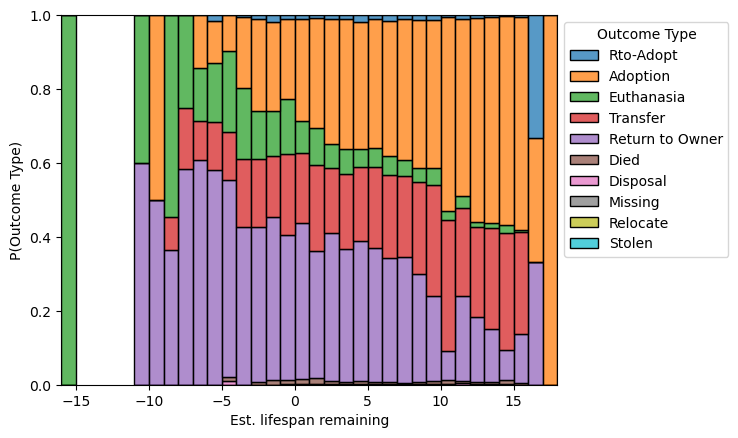

average lifespan ~ Adopted


/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not in

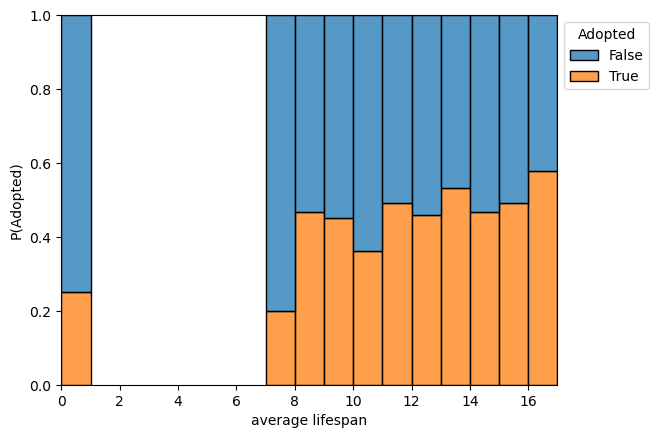

average lifespan ~ Outcome Type


/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not in

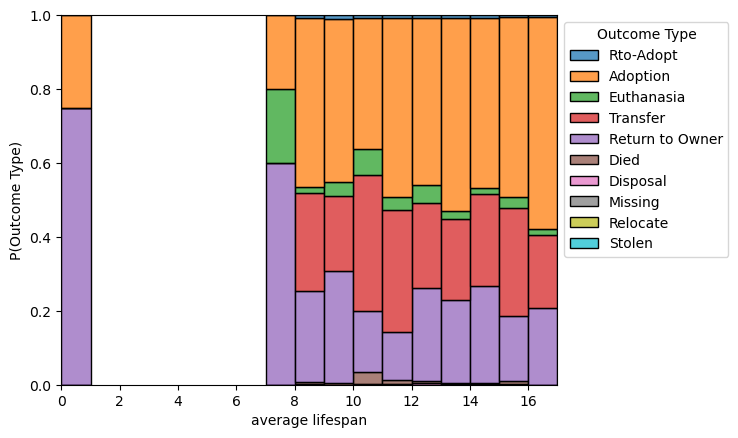

Lifespan Low ~ Adopted


/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not in

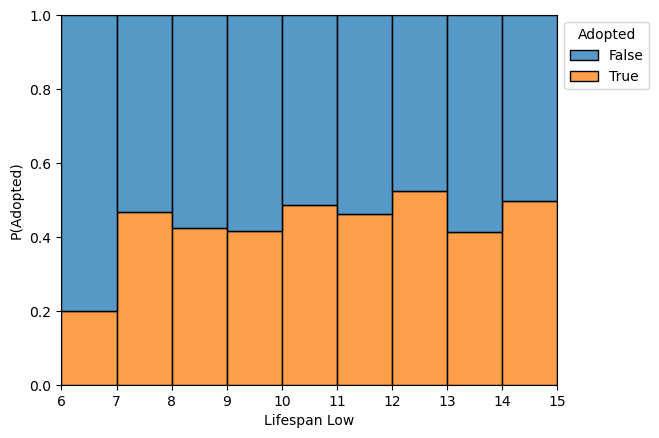

Lifespan Low ~ Outcome Type


/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not in

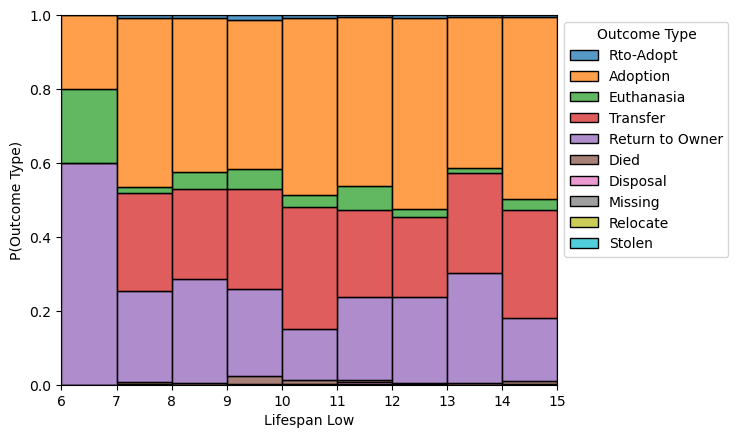

Lifespan High ~ Adopted


/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not in

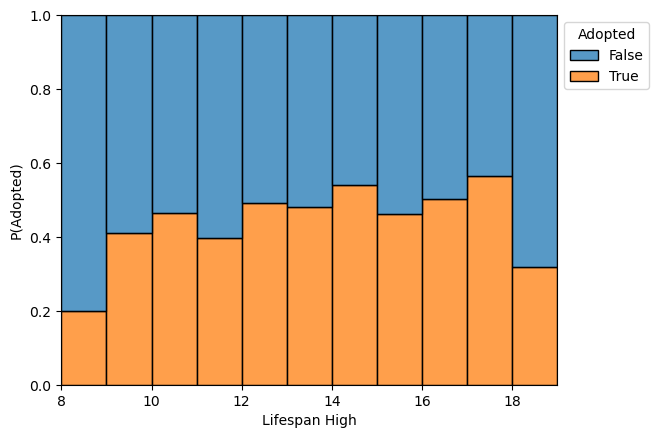

Lifespan High ~ Outcome Type


/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not in

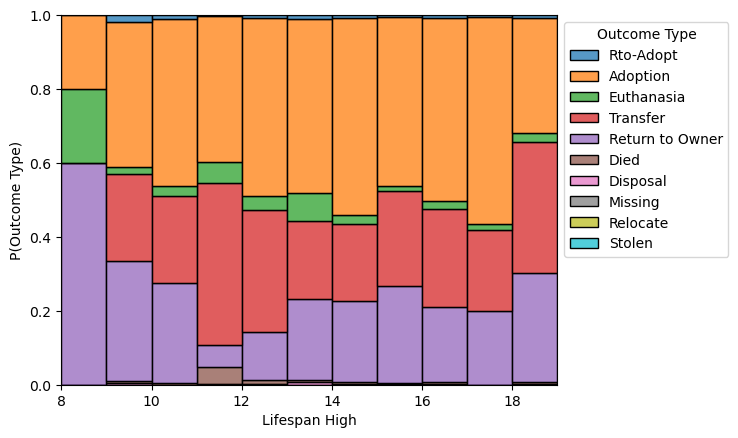

Age upon Outcome (years) ~ Adopted


/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not in

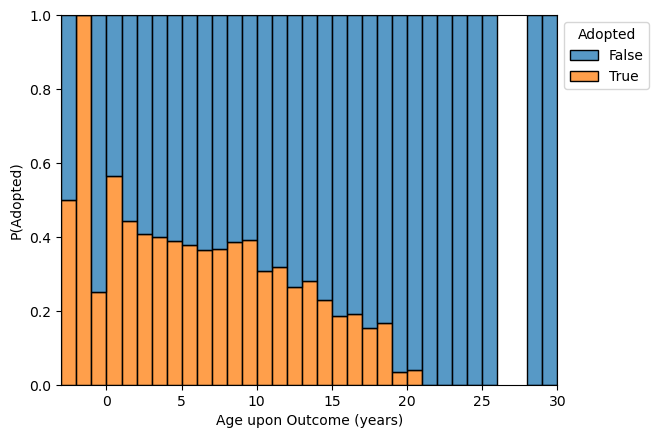

Age upon Outcome (years) ~ Outcome Type


/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not in

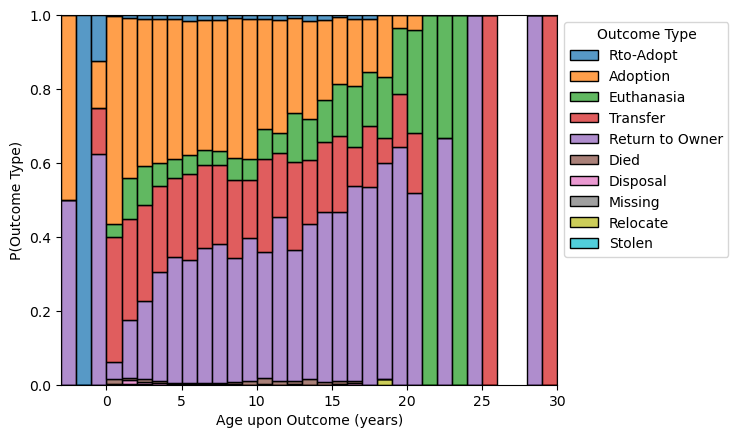

Color 0 H ~ Adopted


/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not in

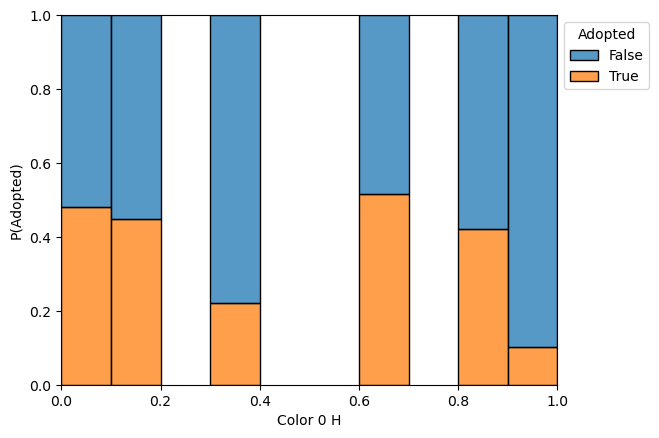

Color 0 H ~ Outcome Type


/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not in

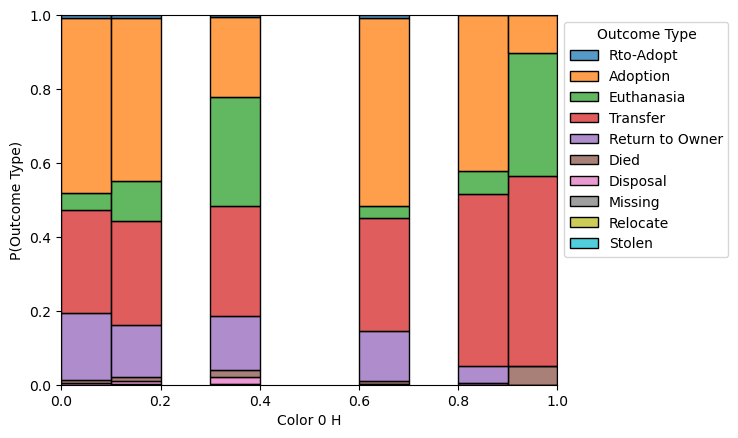

Color 0 S ~ Adopted


/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not in

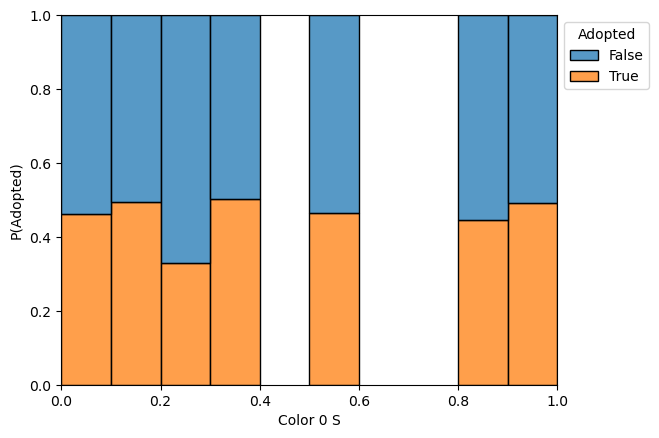

Color 0 S ~ Outcome Type


/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not in

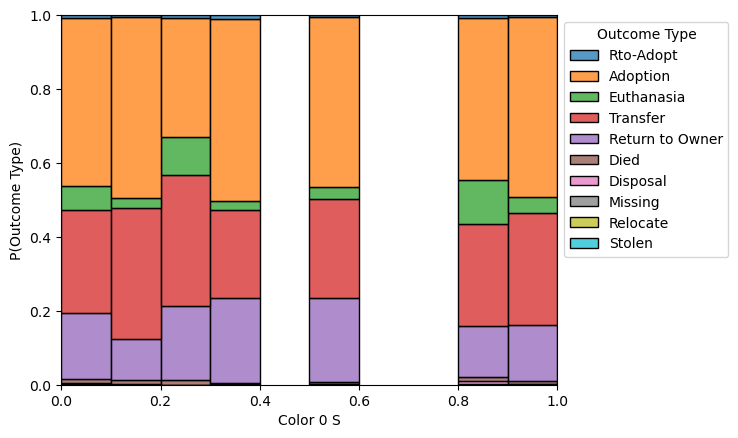

Color 0 V ~ Adopted


/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not in

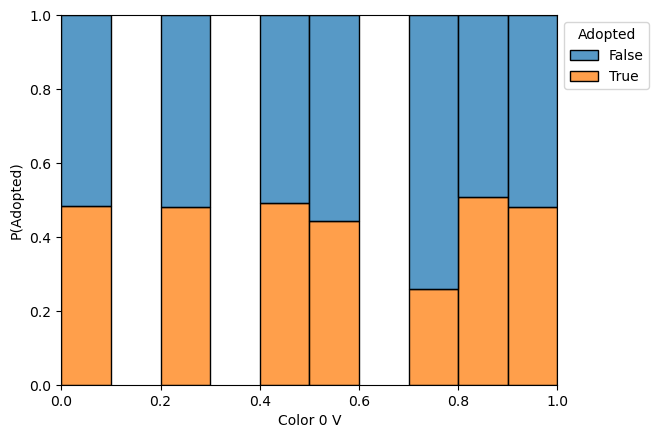

Color 0 V ~ Outcome Type


/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/isaac/miniconda3/envs/cse3380/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not in

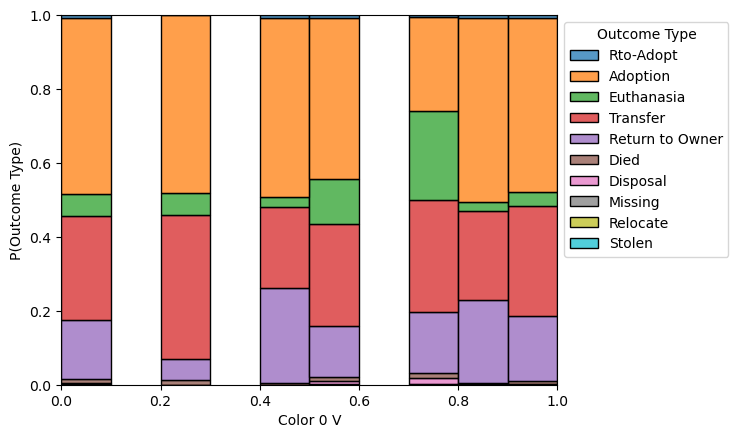

In [18]:
df_out_1 = df_out.assign(Adopted=df_out.Adopted.fillna(False))
df_out_with_breeds_info_1 = df_out_with_breeds_info.assign(Adopted=df_out.Adopted.fillna(False))

def correlo_histogram(df, independent, dependent, binwidth):
    print(f'{independent} ~ {dependent}')
    # TODO 8: add error bars when the dependent variable is "Adopted"
    # (see how the confidence interval was constructed in the previous cell
    # for regression by color)
    
    ax=sns.histplot(data=df,
             x=independent,
             hue=dependent,
             multiple='fill',
             binwidth=binwidth)
    sns.move_legend(ax, 'upper left', bbox_to_anchor=(1,1))
    plt.ylabel(f"P({dependent})")
    plt.show()

independent_vars_breeds_info = [
    ['average height', 2],
    ['Est. lifespan remaining', 1],
    ['average lifespan', 1],
    ['Lifespan Low', 1],
    ['Lifespan High', 1]
]

independent_vars_individuals = [
    ['Age upon Outcome (years)', 1],
    ['Color 0 H', 0.1],
    ['Color 0 S', 0.1],
    ['Color 0 V', 0.1]
]

for [independent, binwidth] in independent_vars_breeds_info:
    for dependent in ['Adopted', 'Outcome Type']:
        correlo_histogram(df_out_with_breeds_info_1, independent, dependent, binwidth)

for [independent, binwidth] in independent_vars_individuals:
    for dependent in ['Adopted', 'Outcome Type']:
        correlo_histogram(df_out_1, independent, dependent, binwidth)

Based on these charts it seems the strongest indicator of adoption in a pet is its age. The graph 'est lifespan remaining ~ adopted' shows this very strongly as does the graph 'age upon outcome ~ adopted'.

Another correlation in these graphs is in 'average lifespan ~adoption'. This once again shows that potential adopters favor pets with a lot of years ahead of them. 

This seems to imply that the biggest indicator of whether or not an animal will be adopted is its age. Younger pets are more likely to be adopted by a rather strong degree.


## Age


Lets see if we can pull of some logistic regression of age ~ adoption


In [19]:
df_al = df_out.dropna(how='all',axis=0) 
df_al['Age upon Outcome (years)'] = df_al['Age upon Outcome (years)'].fillna(0)
df_al['Adopted'] = df_al['Adopted'].fillna(False)


y_data = df_al['Adopted'].astype(dtype=int)
x_data = df_al['Age upon Outcome (years)'].astype(dtype=float)


x_data = x_data.values.reshape(-1,1)

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)
model = LogisticRegression()
model.fit(x_training_data, y_training_data)
# predictions = model.predict(x_test_data)
print(confusion_matrix(y_test_data, model.predict(x_test_data)))
print(classification_report(y_test_data, model.predict(x_test_data)))

[[14954  8618]
 [10069 11213]]
              precision    recall  f1-score   support

           0       0.60      0.63      0.62     23572
           1       0.57      0.53      0.55     21282

    accuracy                           0.58     44854
   macro avg       0.58      0.58      0.58     44854
weighted avg       0.58      0.58      0.58     44854



The precision of 0.60 with a large support could be useful.